In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
import pandas as pd
df=pd.read_excel(r'C:\Users\KIIT\Desktop\Data_Train (1).xlsx')
df.head(9)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [33]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [36]:
df.shape

(6019, 12)

In [37]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Text(0.5, 1.0, 'Missing Values Count')

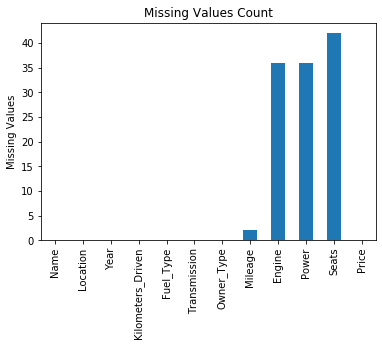

In [81]:
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel("Missing Values")
plt.title("Missing Values Count")        

In [42]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['nullval'])
j=1
tot=len(df)
null_values['percent']=null_values['nullval']/tot
round(null_values*1,3).sort_values('percent',ascending=False)

,nullval,percent
Seats,42,0.007
Engine,36,0.006
Power,36,0.006
Name,0,0.000
Location,0,0.000
Year,0,0.000
Kilometers_Driven,0,0.000
Fuel_Type,0,0.000
Transmission,0,0.000
Owner_Type,0,0.000


In [46]:
cat_val = ["Name", "Engine", "Power", "Location","Fuel_Type", "Transmission", "Owner_Type","Mileage"]

for col in cat_val:
    print ([col]," : ",df[col].unique())

['Name']  :  ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
['Engine']  :  ['998 CC' '1582 CC' '1199 CC' '1248 CC' '1968 CC' '814 CC' '1461 CC'
 '2755 CC' '1598 CC' '1462 CC' '1497 CC' '2179 CC' '2477 CC' '1498 CC'
 '2143 CC' '1995 CC' '1984 CC' '1197 CC' '2494 CC' '1798 CC' '2696 CC'
 '2698 CC' '1061 CC' '1198 CC' '2987 CC' '796 CC' '624 CC' '1999 CC'
 '1991 CC' '2694 CC' '1120 CC' '2498 CC' '799 CC' '2393 CC' '1399 CC'
 '1796 CC' '2148 CC' '1396 CC' '1950 CC' '4806 CC' '1998 CC' '1086 CC'
 '1193 CC' '2982 CC' '1493 CC' '2967 CC' '2993 CC' '1196 CC' '1799 CC'
 '2497 CC' '2354 CC' '1373 CC' '2996 CC' '1591 CC' '2894 CC' '5461 CC'
 '1595 CC' '936 CC' '1997 CC' nan '1896 CC' '1390 CC' '1364 CC' '2199 CC'
 '993 CC' '999 CC' '1405 CC' '2956 CC' '1794 CC' '995 CC' '2496 CC'
 '1599 CC' '2400 CC' '1495 CC' '2523 CC' '793 CC' '4134 CC' '1596 CC'
 '1395 CC' '2953 CC' 

In [49]:
df.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

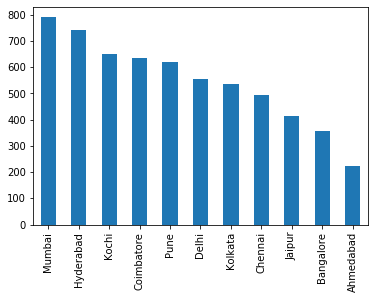

In [99]:
df.Location.value_counts().plot(kind='bar')

In [50]:
df.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

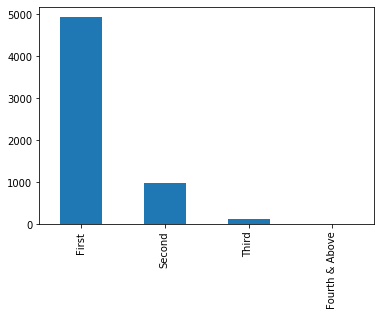

In [64]:
df.Owner_Type.value_counts().plot(kind='bar')

In [52]:
df.Price.value_counts()

4.50     88
5.50     84
3.50     82
4.25     73
3.25     71
         ..
11.96     1
5.76      1
24.99     1
42.75     1
16.42     1
Name: Price, Length: 1373, dtype: int64

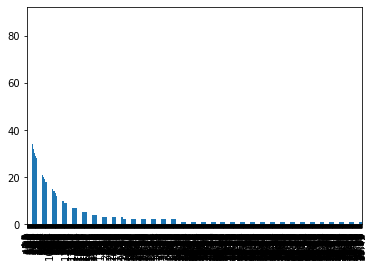

In [101]:
df.Price.value_counts().plot(kind='bar')

In [53]:
df.Year.value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

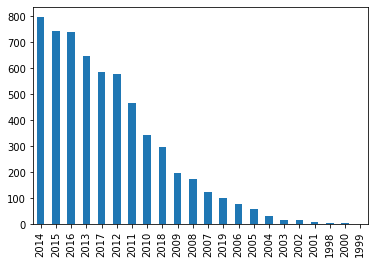

In [67]:
df.Year.value_counts().plot(kind='bar')

In [54]:
df.Kilometers_Driven.value_counts()

60000    82
45000    70
65000    68
50000    61
70000    60
         ..
50446     1
54540     1
70920     1
75014     1
83969     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

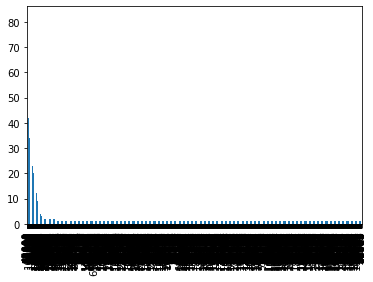

In [95]:
df.Kilometers_Driven.value_counts().plot(kind='bar')

In [55]:
df.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

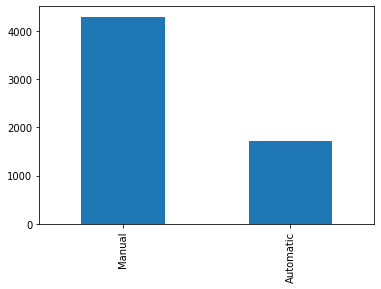

In [68]:
df.Transmission.value_counts().plot(kind='bar')

In [56]:
df.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

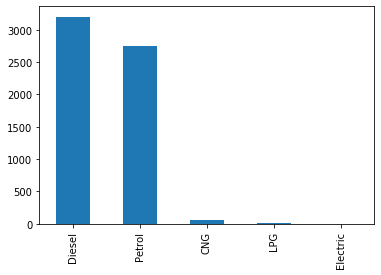

In [69]:
df.Fuel_Type.value_counts().plot(kind='bar')

In [57]:
df.Mileage.value_counts()

17.0 kmpl     172
18.9 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
14.81 kmpl      1
19.44 kmpl      1
21.1 km/kg      1
8.1 kmpl        1
18.23 kmpl      1
Name: Mileage, Length: 442, dtype: int64

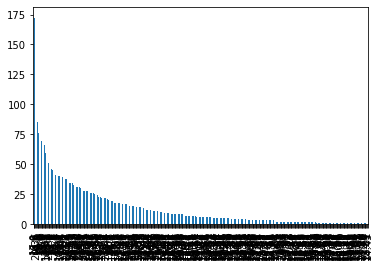

In [96]:
df.Mileage.value_counts().plot(kind='bar')

In [59]:
df.Seats.value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

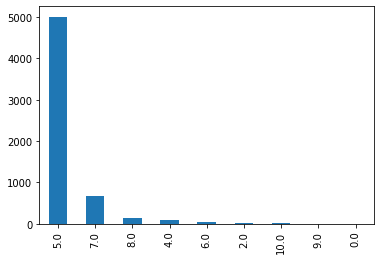

In [70]:
df.Seats.value_counts().plot(kind='bar')

In [60]:
df.Power.value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
246.74 bhp      1
61 bhp          1
395 bhp         1
168 bhp         1
130.3 bhp       1
Name: Power, Length: 372, dtype: int64

In [61]:
df.Engine.value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
2706 CC      1
1797 CC      1
1422 CC      1
3200 CC      1
2773 CC      1
Name: Engine, Length: 146, dtype: int64

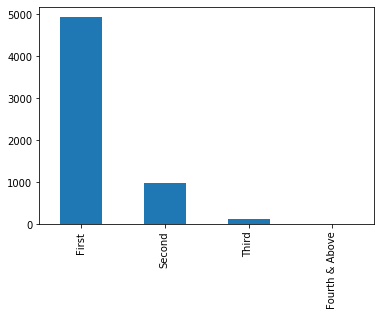

In [91]:
df.Owner_Type.value_counts().plot(kind='bar')

In [ ]:
df['Engine']=df['Engine'].str.replace("CC","")
df['Engine']=pd.to_numeric(df['Engine'])
df['Mileage']=df['Mileage'].str.replace("km/kg","")
df['Mileage']=df['Mileage'].str.replace("kmpl","")
df['Mileage']=pd.to_numeric(df['Mileage'])
df['Power']=df['Power'].str.replace("bhp","")
df['Power']=df['Power'].str.replace("null","0")
df['Power']=pd.to_numeric(df['Power'])

In [93]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5983.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,111.227632,5.278735,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,55.460923,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,0.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,92.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [98]:
df['Name']=[e.split()[0] for e in df['Name']]
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


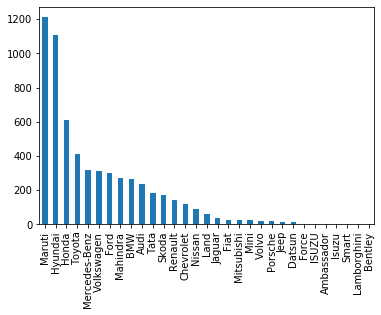

In [102]:
df.Name.value_counts().plot(kind='bar')

In [103]:
x='Kilometers_Driven'
l=len(df)+1
while len(df)<l:
  l=len(df)
  m=np.mean(df[x])
  std=np.std(df[x])
  df=df[abs(df[x]-m)<(4*std)]

In [104]:
df=df.interpolate(method='linear',limit_direction='forward')

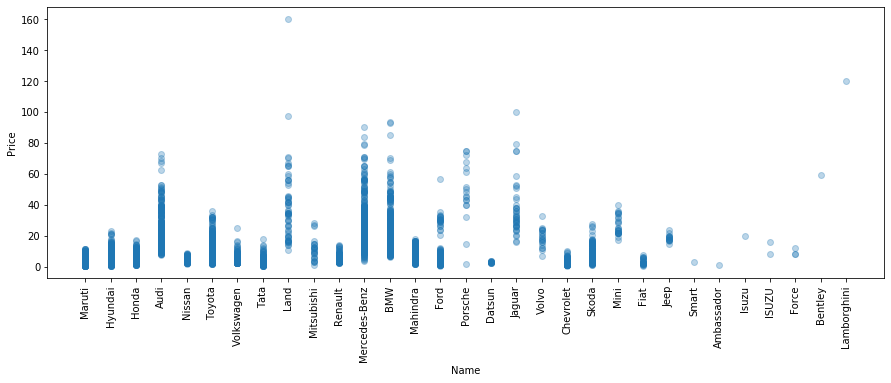

In [109]:
plt.figure(figsize=(15,5))
plt.scatter(df.iloc[:,0].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[0])
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [107]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000,5964.000000
mean,2013.392354,55867.592052,18.171092,1616.843561,111.314238,5.268360,9.506880
std,3.244311,30645.708950,4.563984,598.993332,55.491133,0.794786,11.205118
min,1998.000000,171.000000,0.000000,72.000000,0.000000,0.000000,0.440000
25%,2012.000000,33704.250000,15.260000,1197.000000,74.000000,5.000000,3.500000
50%,2014.000000,52862.500000,18.190000,1493.000000,92.000000,5.000000,5.645000
75%,2016.000000,72000.000000,21.100000,1968.000000,138.085000,5.000000,10.000000
max,2019.000000,178280.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


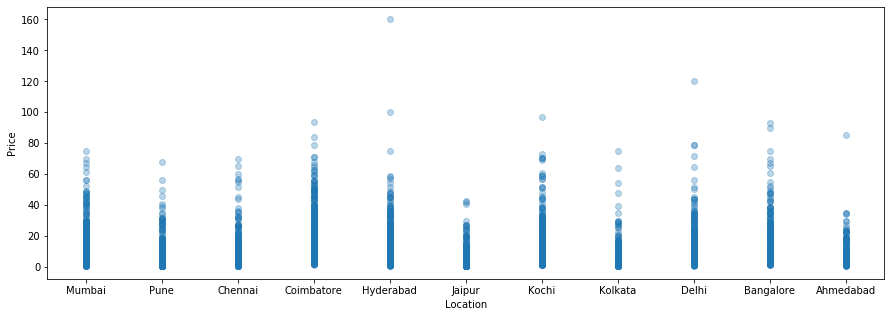

In [112]:
plt.figure(figsize=(15,5))
plt.scatter(df.iloc[:,1].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[1])
plt.ylabel("Price")
plt.show()

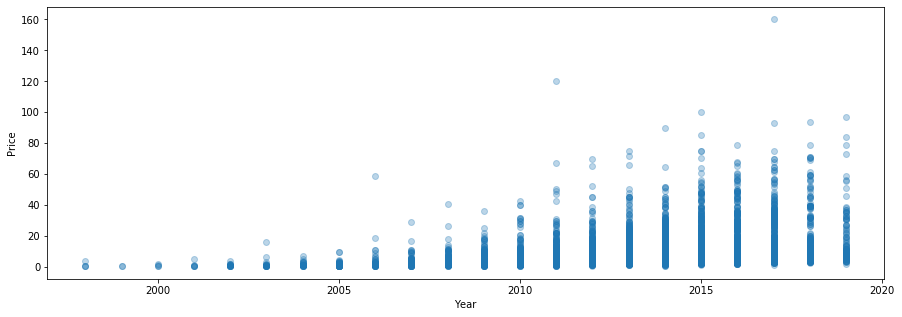

In [114]:
plt.figure(figsize=(15,5))
plt.scatter(df.iloc[:,2].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[2])
plt.ylabel("Price")
plt.show()

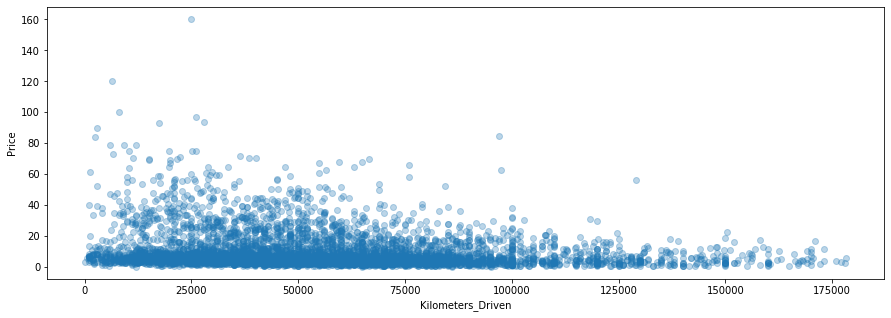

In [116]:
plt.figure(figsize=(15,5))
plt.scatter(df.iloc[:,3].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[3])
plt.ylabel("Price")
plt.show()

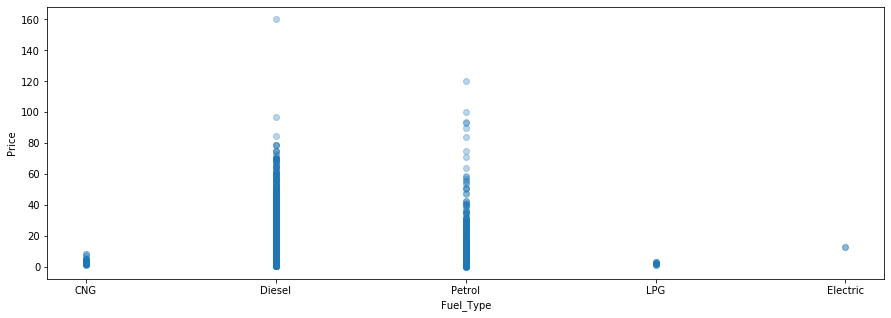

In [117]:
plt.figure(figsize=(15,5))
plt.scatter(df.iloc[:,4].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[4])
plt.ylabel("Price")
plt.show()

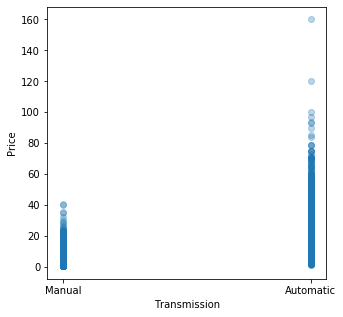

In [118]:
plt.figure(figsize=(5,5))
plt.scatter(df.iloc[:,5].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[5])
plt.ylabel("Price")
plt.show()

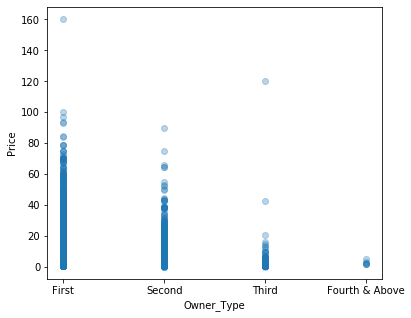

In [120]:
plt.figure(figsize=(6,5))
plt.scatter(df.iloc[:,6].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[6])
plt.ylabel("Price")
plt.show()

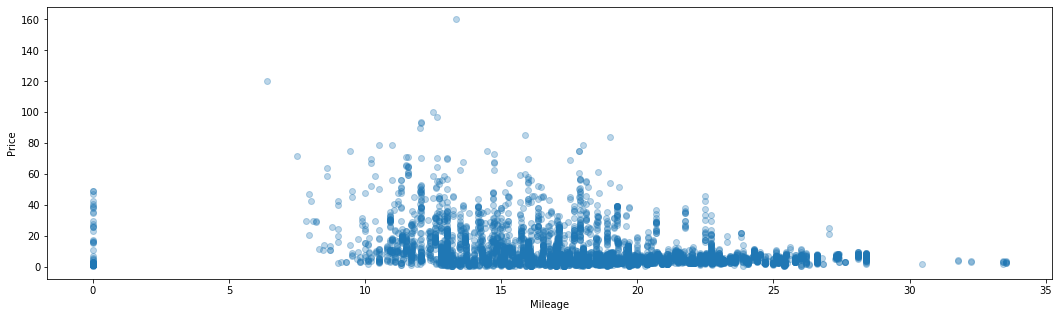

In [124]:
plt.figure(figsize=(18,5))
plt.scatter(df.iloc[:,7].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[7])
plt.ylabel("Price")
plt.show()

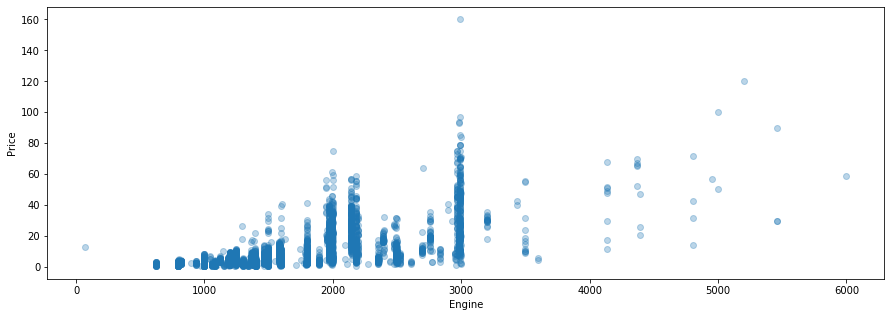

In [125]:
plt.figure(figsize=(15,5))
plt.scatter(df.iloc[:,8].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[8])
plt.ylabel("Price")
plt.show()

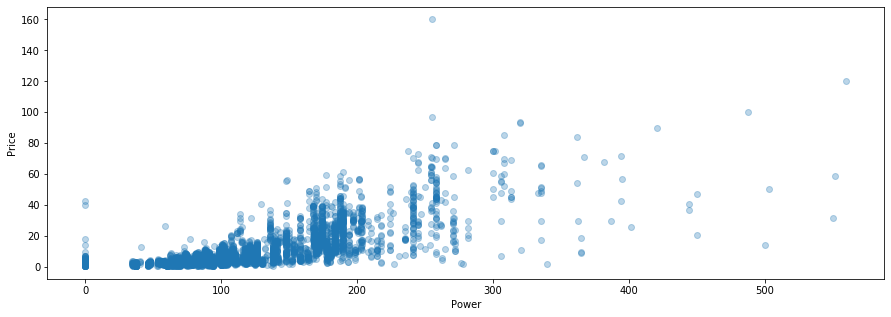

In [126]:
plt.figure(figsize=(15,5))
plt.scatter(df.iloc[:,9].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[9])
plt.ylabel("Price")
plt.show()

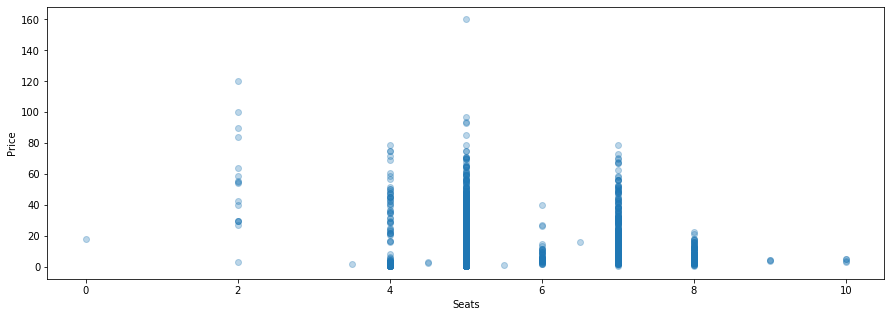

In [127]:
plt.figure(figsize=(15,5))
plt.scatter(df.iloc[:,10].values,df['Price'].values,alpha=0.3)
plt.xlabel(df.columns[10])
plt.ylabel("Price")
plt.show()

55867.592052313885 30643.139618247184


(array([ 507., 1138., 1388., 1383.,  807.,  365.,  168.,  108.,   71.,
          29.]),
 array([1.710000e+02, 1.798190e+04, 3.579280e+04, 5.360370e+04,
        7.141460e+04, 8.922550e+04, 1.070364e+05, 1.248473e+05,
        1.426582e+05, 1.604691e+05, 1.782800e+05]),
 <a list of 10 Patch objects>)

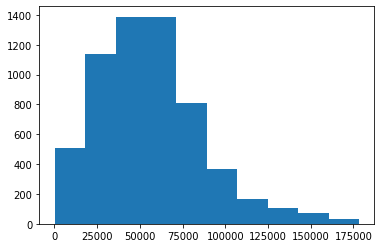

In [128]:
x='Kilometers_Driven'
m=np.mean(df[x])
std=np.std(df[x])
print(m,std)
plt.hist(df['Kilometers_Driven'])

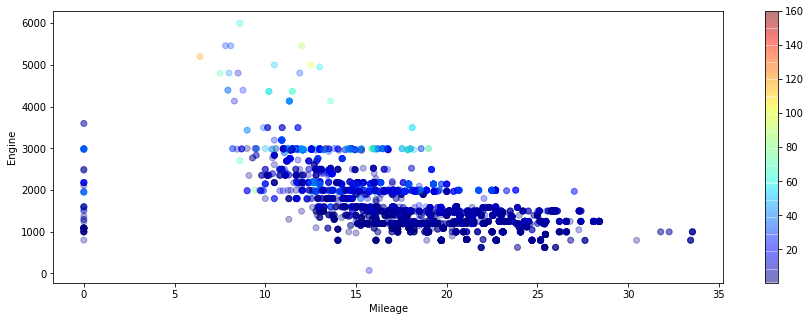

In [133]:
x='Mileage'
y='Engine'
plt.figure(figsize=(15,5))
plt.scatter(df[x],df[y],c=df.Price,cmap='jet',alpha=0.3)
plt.xlabel(x)
plt.ylabel(y)
plt.colorbar()
plt.show()

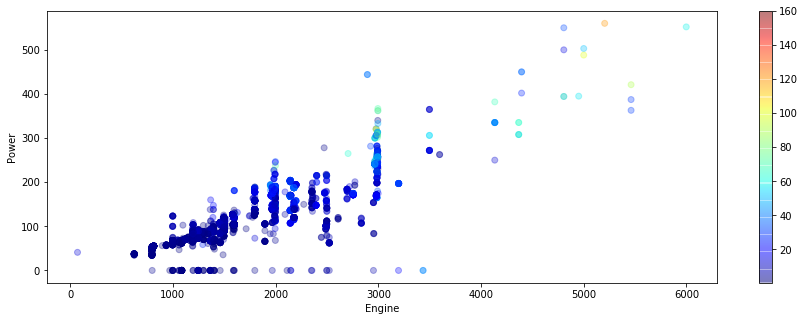

In [134]:
x='Engine'
y='Power'
plt.figure(figsize=(15,5))
plt.scatter(df[x],df[y],c=df['Price'],cmap='jet',alpha=0.3)
plt.xlabel(x)
plt.ylabel(y)
plt.colorbar()
plt.show()

In [143]:
df_c = df.copy()
df_c = df_c[
    (df_c["Year"].between(2008, 2019, inclusive=True)) &
    (df_c["Power"].between(40, 220, inclusive=True)) &
    (df_c["Price"].between(0.1, 60, inclusive=True))
]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A212B9ADC8>,
      dtype=object)

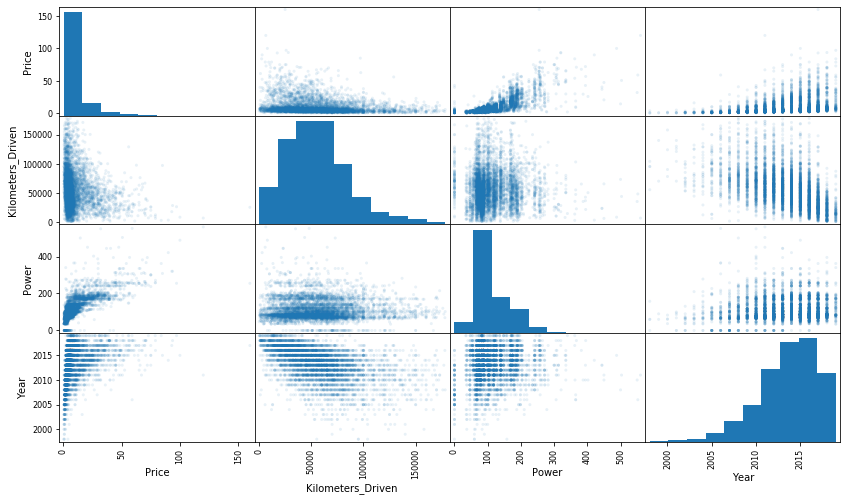

In [139]:
num_attributes = ["Price","Kilometers_Driven","Power","Year"]
%matplotlib inline
pd.plotting.scatter_matrix(df[num_attributes], figsize = (14,8), alpha = 0.1)

In [142]:
print("previous cars data: ", df.shape[0]/df.shape[0] * df.shape[0])
print("Current Data Amount: ", df.shape[0]/df.shape[0] * df.shape[0])
print("Current Data Amount %: ", df.shape[0]/df.shape[0])

previous cars data:  5964.0
Current Data Amount:  5964.0
Current Data Amount %:  1.0


DATA CLEANSING

In [144]:
df_clean = df.copy()
df_clean = df_clean[
    (df_clean["Year"].between(2008, 2019, inclusive=True)) &
    (df_clean["Power"].between(40, 220, inclusive=True)) &
    (df_clean["Price"].between(0.1, 60, inclusive=True)) 
     ]
df_clean['Mileage'].fillna(value='blank', inplace=True)
df_clean['Engine'].fillna(value='blank', inplace=True)
df_clean['Power'].fillna(value='blank', inplace=True)
df_clean['Seats'].fillna(value='blank', inplace=True)
for col in df_clean:
    if df_clean[col].dtype == "object":
        df_clean[col] = df_clean[col].astype('category')
        
cat_columns = df_clean.select_dtypes(['category']).columns

df_clean[cat_columns] = df_clean[cat_columns].apply(lambda x: x.cat.codes)

In [145]:
df_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,15,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,8,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,7,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,15,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,0,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
train_set, test_set = train_test_split(df_clean, test_size = 0.2, random_state = 42)
df_price = train_set["Price"].copy()
df = train_set.drop("Price", axis=1)

In [157]:
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,A,b=None):
        return self
    def transform(self, A):
        return A[self.attribute_names].values

In [158]:
cat_attribs = ["Name","Fuel_Type","Location","Owner_Type"]
num_attribs = list(df.drop(cat_attribs, axis=1))
num_pipeline = Pipeline([
    ("selector", DFSelector(num_attribs)),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DFSelector(cat_attribs)),
    ("encoder", OneHotEncoder(sparse=True))
])

full_pipeline = FeatureUnion(transformer_list =[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [159]:
df_prepared = full_pipeline.fit_transform(df)

ANALYSING MODELS

In [160]:
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_price, df_predictions)
lin_r2 = r2_score(df_price, df_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_mse)
print(lin_rmse)
print(lin_r2)

10.65538660830269
3.2642589677142175
0.8364678355528852


In [169]:
df_predictions[0:4]

array([9.99148099, 6.55406406, 4.40212981, 5.8928742 ])

In [170]:
list(df_price[0:4])

[10.75, 6.9, 4.05, 6.25]

In [171]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_price)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [176]:
df_predictions=tree_reg.predict(df_prepared)
tree_mse=mean_squared_error(df_price,df_predictions)
tree_r2=r2_score(df_price,df_predictions)
tree_rmse=np.sqrt(tree_mse)
print(tree_rmse)
print(tree_r2)

0.018710918723485414
0.9999946269089782


In [177]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(random_state=42,n_jobs =-1,max_depth = 30 )
forest_reg.fit(df_prepared,df_price)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [179]:
df_predictions=forest_reg.predict(df_prepared)
forest_mse=mean_squared_error(df_price, df_predictions)
forest_r2=r2_score(df_price, df_predictions)
forest_rmse=np.sqrt(forest_mse)
print(forest_rmse)
print(forest_r2)

0.8501271141596385
0.9889082082019885


In [183]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Standard Deviation:", scores.std())
    print("Mean:", scores.mean())

In [186]:
scores=cross_val_score(lin_reg, df_prepared, df_price,
                         scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores=np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [3.29628127 3.23743316 3.43097614 3.30292479]
Standard Deviation: 0.07062007868573662
Mean: 3.316903837691825


In [187]:
feature_importances=forest_reg.feature_importances_
feature_importances

array([1.84284071e-01, 3.71832600e-02, 7.65991021e-03, 1.90894708e-02,
       3.89755604e-02, 6.01860149e-01, 3.08051604e-03, 3.55334807e-03,
       2.14505642e-03, 1.51254097e-03, 3.62709023e-06, 8.42886012e-05,
       1.71429130e-06, 1.46272112e-03, 1.61440086e-03, 2.23581655e-03,
       1.74228453e-06, 8.81057287e-05, 1.88156476e-03, 5.92565051e-04,
       2.24986056e-02, 1.30124272e-03, 5.82441418e-04, 2.35085563e-02,
       1.16178265e-02, 1.85804884e-04, 1.18077480e-04, 2.10726036e-04,
       1.47196350e-03, 3.98945090e-04, 2.64041920e-03, 1.54707199e-03,
       3.82434730e-04, 9.78001655e-06, 2.08967849e-03, 2.75322676e-04,
       7.07203451e-07, 1.90324034e-03, 4.70526235e-04, 2.09136194e-03,
       9.34184895e-04, 3.10552494e-03, 2.52804251e-03, 4.16196695e-03,
       7.36760111e-04, 1.87192025e-03, 1.80709906e-03, 1.78780566e-03,
       6.67076799e-04, 9.06239118e-04, 7.26142983e-07, 7.98867722e-04,
       7.86241414e-05])

In [188]:
cat_encoder=cat_pipeline.named_steps["encoder"]
attributes=num_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.601860149165909, 'Power'),
 (0.18428407088574725, 'Year'),
 (0.038975560427993106, 'Engine'),
 (0.03718326004106853, 'Kilometers_Driven'),
 (0.019089470848966738, 'Mileage'),
 (0.007659910213392916, 'Transmission'),
 (0.0030805160354980344, 'Seats')]

FINAL OUTCOME

In [189]:
from sklearn.preprocessing import StandardScaler
final_model = forest_reg
df_test = test_set.drop("Price", axis = 1)
df_price_test = test_set["Price"].copy()
df_test_prepared = full_pipeline.transform(df_test)
from sklearn.metrics import mean_squared_error
final_predictions = final_model.predict(df_test_prepared)
final_mse = mean_squared_error(df_price_test, final_predictions)
final_r21 = r2_score(df_price_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [190]:
print(final_rmse)
print(final_r21)

2.1407120812550255
0.9334117003084305


In [191]:
final_model.score(df_test_prepared, df_price_test)

0.9334117003084306

In [193]:
from sklearn.preprocessing import StandardScaler
final_model1 = tree_reg
df_test = test_set.drop("Price", axis = 1)
df_price_test = test_set["Price"].copy()
df_test_prepared = full_pipeline.transform(df_test)
from sklearn.metrics import mean_squared_error
final_predictions1 = final_model1.predict(df_test_prepared)
final_mse1 = mean_squared_error(df_price_test, final_predictions1)
final_r2 =r2_score(df_price_test, final_predictions1)
final_rmse1 = np.sqrt(final_mse1)

In [194]:
print(final_rmse1)
print(final_r2)

2.825920718354855
0.8839617014028078


In [196]:
final_model.score(df_test_prepared, df_price_test)

0.9334117003084306